# **Lab Assignment Seven: Sequential Network Architectures**
- Group: `Lab One 3`
    - Salissa Hernandez
    - Juan Carlos Dominguez
    - Leonardo Piedrahita
    - Brice Danvide

### **Business Understanding: Phishing Emails Detection**

Phishing attacks continue to be one of the most prevalent cybersecurity threats, targeting both individuals and organizations with the intent of stealing sensitive information such as login credentials, financial data, or personal details. These attacks often impersonate trusted entities to deceive recipients, leading to financial losses, legal liabilities, and reputational damage for businesses. According to recent cybersecurity reports, phishing attacks account for a significant percentage of data breaches and financial fraud incidents. In response to this growing threat, developing a machine learning-based system to detect and mitigate phishing emails is critical for enhancing organizational security and minimizing the risks associated with these attacks.  

The primary goal of this project is to build a predictive model that can accurately distinguish between phishing and legitimate emails using sequential network architectures such as Convolutional Neural Networks (CNNs) and Transformers. This model will automate the detection process, reducing reliance on manual intervention and improving the speed and accuracy of threat response. The solution will be designed to integrate seamlessly into existing email security infrastructures, such as spam filters or security information and event management (SIEM) systems, providing an additional layer of defense against phishing attempts.  

Key stakeholders in this project include several groups within an organization:  

- **IT Security Teams:** These teams are responsible for monitoring and mitigating cybersecurity threats in real time. The phishing detection model will serve as a critical tool to help them quickly identify and neutralize phishing emails before they reach employees. By reducing the volume of phishing emails that reach end users, IT security teams can focus on more sophisticated threats that require manual investigation.  

- **End Users (Employees and Customers):** Phishing emails often target employees within an organization, exploiting human error as a vulnerability. By deploying a robust detection system, end users will experience fewer phishing emails in their inboxes, reducing the likelihood of falling victim to scams. This enhances overall productivity and reduces the risk of compromised accounts or data breaches.  

- **Executives and Management:** Senior management is concerned with the broader implications of cybersecurity threats, such as financial losses, operational disruptions, and damage to the organization’s reputation. A successful phishing detection system will not only prevent financial losses but also safeguard the organization’s brand and customer trust. Furthermore, reducing the risk of data breaches can help the organization avoid regulatory fines and legal consequences associated with data protection laws like GDPR, HIPAA, or CCPA.  

The success of the model will be measured using three key performance metrics: **precision**, **recall**, and **F1-score.** Each of these metrics plays a critical role in evaluating the effectiveness of the phishing detection system. Precision represents the proportion of emails classified as phishing that are actually phishing. A high precision score (ideally above 90%) ensures that legitimate emails are not frequently misclassified as phishing, which is crucial for maintaining the efficiency and reliability of email communication within the organization.  

Recall, on the other hand, measures the proportion of actual phishing emails that are correctly identified by the model. Given the high stakes of failing to detect a phishing email, a recall score above 95% is desirable to ensure that nearly all phishing attempts are flagged and mitigated. High recall is essential for minimizing security breaches and protecting sensitive information.  

Finally, the F1-score, which is the harmonic mean of precision and recall, provides a balanced assessment of the model's performance, especially in cases where there may be an imbalance between phishing and legitimate emails. An F1-score above 92% would indicate that the model is performing well in both identifying phishing emails and minimizing false positives, striking the right balance between precision and recall.  

In addition to these metrics, the success of the project will also depend on the model's scalability and integration capabilities. The system should be able to handle large volumes of email data without significant latency and should be easily adaptable to new phishing tactics as they emerge. By achieving these performance benchmarks and addressing the needs of key stakeholders, this project aims to deliver a comprehensive solution for phishing email detection that enhances the overall security posture of the organization and provides measurable business value.

Dataset:
- https://www.kaggle.com/datasets/subhajournal/phishingemails/data

# **1. Preparation**

In [1]:
# Modules & Libraries
import pandas as pd
import numpy as np
import missingno as mn
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
from wordcloud import WordCloud

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split, StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier  

# Tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## **1.1 Loading Data & Preparing Variables**

- [1 points] 
    - Define and prepare your class variables. 
    - Use proper variable representations (int, float, one-hot, etc.). 
    - Use pre-processing methods (as needed). 
    - Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created). 
    - Discuss methods of tokenization in your dataset as well as any decisions to force a specific length of sequence.  

In [2]:
path = "../../Data/phising_email.csv"

df = pd.read_csv(path)

df.head(10)

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email
5,5,global risk management operations sally congra...,Safe Email
6,6,"On Sun, Aug 11, 2002 at 11:17:47AM +0100, wint...",Safe Email
7,7,"entourage , stockmogul newsletter ralph velez ...",Phishing Email
8,8,"we owe you lots of money dear applicant , afte...",Phishing Email
9,9,re : coastal deal - with exxon participation u...,Safe Email


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18650 entries, 0 to 18649
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  18650 non-null  int64 
 1   Email Text  18634 non-null  object
 2   Email Type  18650 non-null  object
dtypes: int64(1), object(2)
memory usage: 437.2+ KB


In [4]:
# Dropping Unnecessary Columns:
df.drop(columns=['Unnamed: 0'], inplace=True) 

In [5]:
# Renaming Columns
df = df.rename(columns={"Email Text": "text", "Email Type": "label"})

In [6]:
df.head(5)

,text,label
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,the other side of * galicismos * * galicismo *...,Safe Email
2,re : equistar deal tickets are you still avail...,Safe Email
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18650 entries, 0 to 18649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    18634 non-null  object
 1   label   18650 non-null  object
dtypes: object(2)
memory usage: 291.5+ KB


### Checking for Duplicate Values

In [8]:
# Checking for duplicates
duplicates_before = df.duplicated().sum()
print(f'Duplicates before dropping: {duplicates_before}')

Duplicates before dropping: 1111


In [9]:
# Dropping duplicates
df.drop_duplicates(inplace=True)

### Checking for Missing/Null Values

<Axes: >

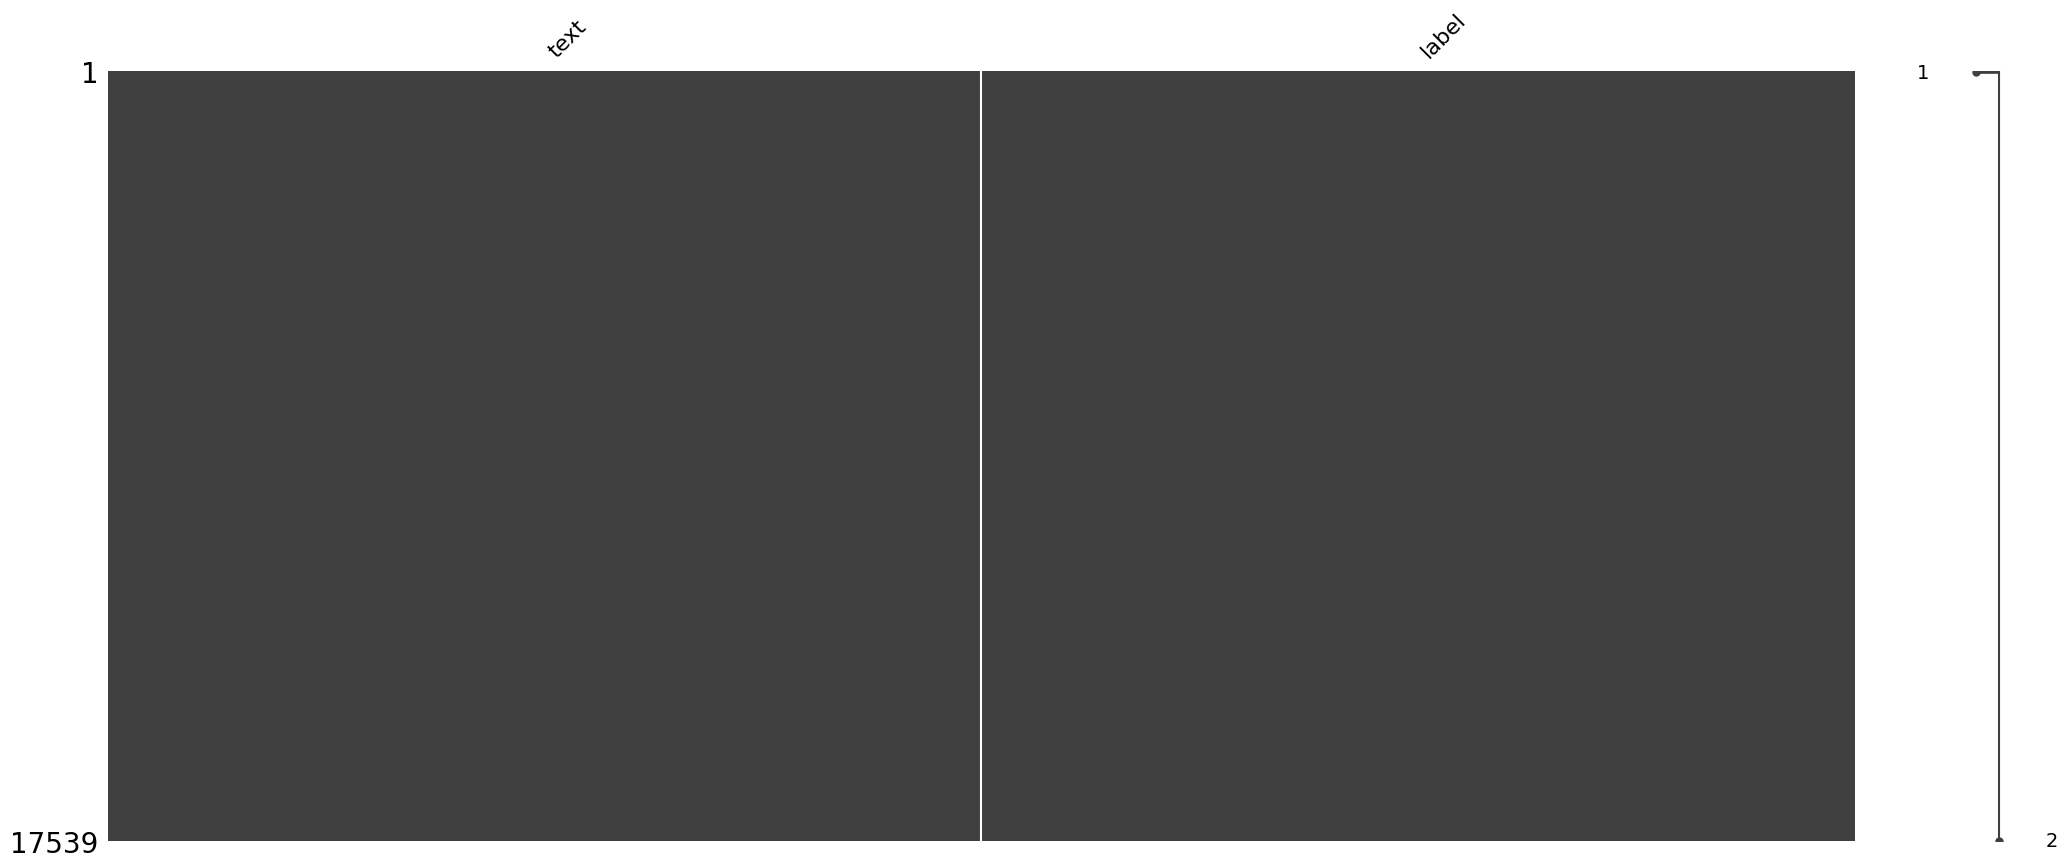

In [10]:
# Show missing data
mn.matrix(df)

In [11]:
# Checking for null values
df.isnull().sum()

text     1
label    0
dtype: int64

In [12]:
# Dropping null value
df.dropna(subset=['text'], inplace=True)

In [13]:
# Checking if there are still null values
df.isnull().sum()

text     0
label    0
dtype: int64

In [14]:
# Resetting the index
df = df.reset_index(drop=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17538 entries, 0 to 17537
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    17538 non-null  object
 1   label   17538 non-null  object
dtypes: object(2)
memory usage: 274.2+ KB


In [16]:
df.shape

(17538, 2)

### Verifying Data Quality

In [17]:
# Downloads wordnet
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Converts text to lowercase
    text = text.lower()

    # Removes special characters but preserve spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Replaces multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text).strip()

    # Lemmatizes words (optional for improving text representation)
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words]

    # Joins words back into a single string
    return ' '.join(words)

# Applies the preprocessing function to the 'text' column
df['text'] = df['text'].apply(preprocess_text)

[nltk_data] Downloading package wordnet to C:\Users\Juan
[nltk_data]     Dominguez\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [18]:
# Adding a new column to store the length of the text
length = lambda x: len(x)
df["text_length"] = df["text"].map(length)  # addd a column indicating how long a message is
df.head(10)

,text,label,text_length
0,re disc uniformitarianism re sex lang dick hud...,Safe Email,893
1,the other side of galicismos galicismo is a sp...,Safe Email,439
2,re equistar deal ticket are you still availabl...,Safe Email,957
3,hello i am your hot lil horny toy i am the one...,Phishing Email,477
4,software at incredibly low price lower drapery...,Phishing Email,382
5,global risk management operation sally congrat...,Safe Email,2928
6,on sun aug at am wintermute mentioned the impr...,Safe Email,795
7,entourage stockmogul newsletter ralph velez ge...,Phishing Email,6850
8,we owe you lot of money dear applicant after f...,Phishing Email,498
9,re coastal deal with exxon participation under...,Safe Email,1651


### Visualizations

#### Categorical Distribution of Email Types

In [19]:
# Defines custom colors for the bars
custom_colors = ['#36A2EB', '#FF6384'] 

# Creates the bar chart with custom colors
fig = px.bar(df['label'].value_counts(), 
             x=df['label'].value_counts().index, 
             y=df['label'].value_counts().values,
             color=df['label'].value_counts().index,  
             color_discrete_sequence=custom_colors, 
             labels={'x': 'Email Type', 'y': 'Count'},
             title="Categorical Distribution of Email Types"
)

# Shows the plot
fig.show()

In [20]:
# Defines custom colors for the pie chart
custom_colors = ['#36A2EB', '#FF6384']  

# Creates the pie chart with custom colors
fig = px.pie(df, 
             names='label', 
             color='label',
             color_discrete_sequence=custom_colors,  
             title="Categorical Distribution of Email Types", 
             hole=0.3,
             labels={'label': 'Email Type'}
)

# Shows the plot
fig.show()

In [21]:
# Total Text Length in Each Category
# Aggregates the total text length for each category
length_per_category = df.groupby('label')['text_length'].sum().reset_index()

# Creates a bar chart
fig = px.bar(length_per_category, 
             x='label', 
             y='text_length', 
             color='label', 
             color_discrete_sequence=['#36A2EB', '#FF6384'],  # Custom colors
             title="Total Text Length for Each Email Type",
             labels={'label': 'Email Type', 'text_length': 'Total Text Length'}
)

# Shows the plot
fig.show()


#### Wordcloud of Stopwords

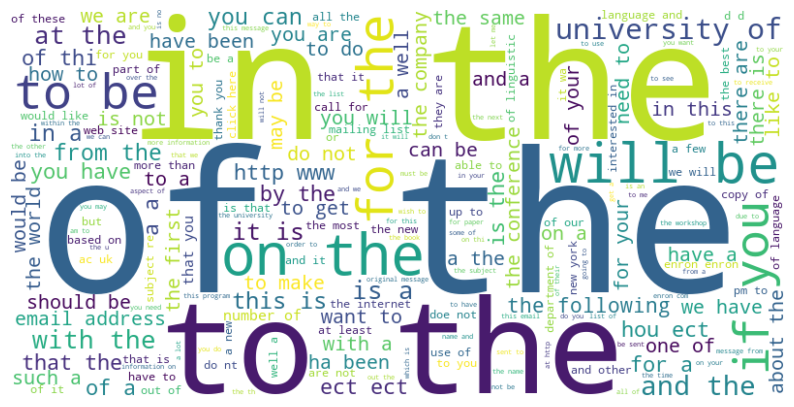

In [22]:
# Word Cloud of Stopwords
#combine all rows into a single string
all_text = " ".join(df['text'])

#create a wordcloud object
word_cloud = WordCloud(stopwords="english",width=800,height=400,background_color='white').generate(all_text)

plt.figure(figsize=(10,6))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis("off")
plt.show()

#### Wordcloud of Unique Words

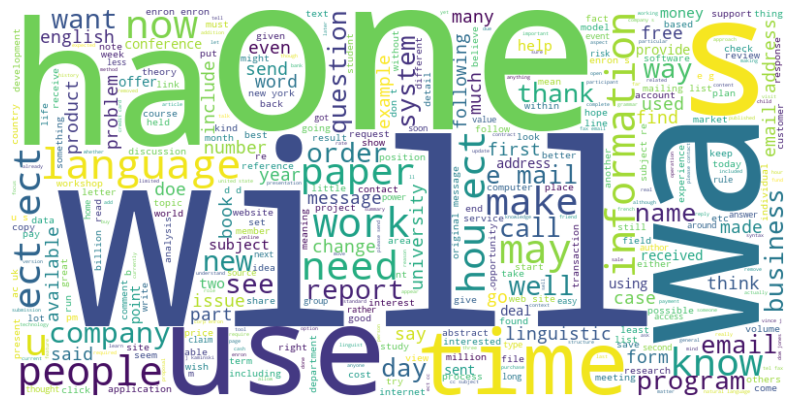

In [23]:
# Wordcloud of Unique Words
#combine all rows into a single string
all_unique_texts = " ".join(df['text'])

#create a wordcloud object
word_cloud = WordCloud(width=800,height=400,background_color='white',max_words=10000).generate(all_unique_texts)
plt.figure(figsize=(10,6))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis("off")
plt.show()

### Encoding Label Attribute

In [24]:
# Encoding label to classify as either Safe or Phishing Email
le = LabelEncoder()

df["label"] = le.fit_transform(df["label"])

In [25]:
# Checking mapping
# Checks the mapping between labels and encoded values
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
label_mapping


{'Phishing Email': 0, 'Safe Email': 1}

#### Tokenization

In [26]:
# Tokenizing the text data
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")  # Using top 5000 words
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])

# Padding sequences to a fixed length (500 tokens)
max_sequence_length = 500
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

# Displaying padded sequences
padded_sequences.shape

(17538, 500)

In [27]:
# Creates a deep copy of the DataFrame
df_preprocessed = df.copy()

# Adds the padded sequences as a new column ('padded_text')
df_preprocessed['padded_text'] = list(padded_sequences)

# Drops the original 'text' column
df_preprocessed.drop(columns=['text'], inplace=True)

# Displays the updated DataFrame
df_preprocessed.head(5)

,label,text_length,padded_text
0,1,893,"[138, 3133, 1, 138, 1034, 3111, 3498, 1, 22, 3..."
1,1,439,"[2, 70, 1064, 3, 1, 1, 9, 6, 594, 247, 46, 98,..."
2,1,957,"[138, 1, 213, 1088, 18, 10, 312, 153, 4, 1710,..."
3,0,477,"[1159, 13, 101, 20, 1346, 1, 1, 4383, 13, 101,..."
4,0,382,"[173, 26, 4588, 663, 124, 1501, 1, 1, 247, 189..."


In [28]:
df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17538 entries, 0 to 17537
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   label        17538 non-null  int32 
 1   text_length  17538 non-null  int64 
 2   padded_text  17538 non-null  object
dtypes: int32(1), int64(1), object(1)
memory usage: 342.7+ KB


### **Final Dataset Description and Methods of Tokenization**

#### **1. Class Variables and Their Representations**

The dataset contains a target variable labeled `label`, which is used to classify emails into two categories: **Safe Email** and **Phishing Email**. The `label` variable is encoded as an integer where:
- `0` represents **Phishing Email**
- `1` represents **Safe Email**

This integer encoding is appropriate for binary classification tasks and facilitates easier handling by machine learning algorithms. The data type of the `label` column is `int32`, which ensures efficient memory usage and compatibility with classification models.

#### **2. Preprocessing Methods**

To prepare the text data for classification, several preprocessing steps were applied:

- **Lowercasing**: All text was converted to lowercase to ensure uniformity, eliminating issues where the same word in different cases (e.g., "Email" and "email") would be treated as different tokens.
  
- **Removal of Special Characters**: Special characters, punctuation, and other non-alphabetic characters were removed using regular expressions (`re.sub(r'[^a-zA-Z\s]', '', text)`). This step helps to focus on the meaningful words and avoid unnecessary noise in the text.

- **Lemmatization**: Words were lemmatized using NLTK's `WordNetLemmatizer` to convert words to their base or root form (e.g., "running" becomes "run"). Lemmatization ensures that variations of the same word are treated as a single token, thereby reducing the dimensionality of the feature space.

- **Stopword Removal**: Common English stopwords (such as "the", "and", "in") were removed to prevent these frequent words from dominating the model's learning process. This was done using the `stopwords` list from NLTK, though an issue with "a" appearing in the word cloud may require revisiting this step.

These preprocessing steps were crucial to preparing the data for tokenization and further analysis.

#### **3. Final Dataset for Classification**

The final dataset used for classification consists of the following columns:

- **`label`**: The target variable, which is the encoded version of the original label. It is now a binary integer, where `0` represents a phishing email and `1` represents a safe email.
  
- **`text_length`**: This is a newly created variable that represents the length of each email's text in characters. It can provide insights into the structure of phishing versus safe emails, such as whether phishing emails tend to be longer or shorter.

- **`padded_text`**: This is the newly added column that contains the tokenized and padded email content. The tokenization process converts each word in the email text into a unique integer, and padding ensures that all sequences have a uniform length of 500 tokens. This column will be used as the input feature for machine learning models.

The original `text` column has been removed from the dataset, as it is no longer needed after the tokenization and padding steps. The dataset now contains the cleaned, tokenized, and padded text data, making it suitable for classification tasks.

#### **4. Tokenization and Sequence Length Decisions**

The text data was tokenized using the `Tokenizer` from Keras. Tokenization converts each word in the email text into a unique integer, which is useful for feeding the data into machine learning models. The steps for tokenization are as follows:

- **Tokenization**: Keras' `Tokenizer` was applied to the `text` column. This tokenizer assigns a unique integer to each word in the vocabulary and converts the emails into sequences of integers.

- **Padding**: After tokenization, sequences were padded to a fixed length of 500 tokens using Keras' `pad_sequences`. This step ensures that all input sequences are of equal length, which is required for models like Recurrent Neural Networks (RNNs). Padding sequences to a standard length avoids issues where some sequences are too short and others are too long.

  - **Choice of Sequence Length**: The decision to pad sequences to 500 tokens was made based on the length distribution of the emails. A length of 500 tokens was chosen to capture the majority of email content while ensuring that shorter emails are padded appropriately. This helps maintain consistency across the dataset without losing valuable information from longer emails.

The final tokenized data is now ready for input into an RNN model, where each sequence is of uniform length, and the `label` variable is encoded for classification.

#### **5. Summary**

In summary, the dataset is now in a suitable format for classification using machine learning models. The preprocessing steps ensured that the text data was cleaned, standardized, and ready for tokenization. The target variable was encoded as integers, and a new feature, `text_length`, was added to provide additional insight into the emails. The tokenization process, combined with sequence padding, ensures that the dataset is compatible with RNNs and other machine learning models. The new column `padded_text` now contains the tokenized and padded email content, and the `text` column has been removed. This final dataset is prepared for training and can be used for classification tasks to distinguish between safe and phishing emails.


## **1.2 Metrics to Evaluate Algorithm Performance**

- [1 points] 
    - Choose and explain what metric(s) you will use to evaluate your algorithm’s performance. 
    - You should give a detailed argument for why this (these) metric(s) are appropriate on your data. 
    - That is, why is the metric appropriate for the task (e.g., in terms of the business case for the task).
    - Please note: rarely is accuracy the best evaluation metric to use. 
    - Think deeply about an appropriate measure of performance.

### **Evaluation Metrics for Phishing Email Detection Model**

#### **Business Context**
Phishing email detection plays a critical role in cybersecurity, especially considering the significant threat posed by phishing attacks. These attacks often aim to steal sensitive information, such as login credentials or financial data, and can result in severe financial loss, data breaches, or reputational damage for businesses. Therefore, detecting phishing emails with high accuracy is crucial for reducing these risks.

For this project, the objective is to develop a machine learning model that can automatically detect phishing emails. The model's performance must be evaluated using metrics that reflect both its ability to accurately identify phishing emails and its ability to avoid misclassifying legitimate emails.

#### **Selected Evaluation Metrics**
The following evaluation metrics were chosen to assess the performance of the phishing email detection model: **Precision**, **Recall**, and **F1-score**.

1. **Precision**
   - **Definition**: Precision is the proportion of emails that were predicted as phishing and are actually phishing. It measures how many of the emails flagged as phishing are truly phishing emails.
   - **Formula**: 
     ```
     Precision = True Positives / (True Positives + False Positives)
     ```
   - **Importance**: High precision is important in this context because it ensures that legitimate emails are not mistakenly classified as phishing emails. Misclassifying legitimate emails as phishing can lead to unnecessary disruptions in communication and cause frustration for users.
   
   - **Business Relevance**: Ensuring high precision helps maintain the efficiency of email communication by reducing the number of false positives. This is critical in business environments, where misclassifying legitimate emails can cause delays, disrupt operations, and lead to loss of productivity.

2. **Recall**
   - **Definition**: Recall measures the proportion of actual phishing emails that are correctly identified by the model. It shows how effectively the model is in detecting phishing emails.
   - **Formula**: 
     ```
     Recall = True Positives / (True Positives + False Negatives)
     ```
   - **Importance**: High recall is crucial for identifying as many phishing emails as possible. Missing phishing emails can lead to security breaches, data theft, or financial fraud, which could have serious consequences for both individuals and organizations.
   
   - **Business Relevance**: In the context of phishing detection, it is more important to identify all phishing emails, as the risks of failing to detect a phishing email are significant. High recall ensures that nearly all phishing emails are flagged, which is critical for protecting sensitive information and minimizing security risks.

3. **F1-Score**
   - **Definition**: The F1-score is the harmonic mean of precision and recall. It provides a balanced measure of a model’s performance, especially when the dataset is imbalanced, as is the case with phishing email detection (i.e., phishing emails are much less frequent than legitimate emails).
   - **Formula**: 
     ```
     F1-score = 2 * (Precision * Recall) / (Precision + Recall)
     ```
   - **Importance**: The F1-score combines both precision and recall into a single metric. This is useful when there is a trade-off between precision and recall, as optimizing one may decrease the other. The F1-score provides a more comprehensive evaluation of model performance by considering both false positives and false negatives.
   
   - **Business Relevance**: The F1-score is especially important in situations where both false positives (legitimate emails flagged as phishing) and false negatives (phishing emails missed by the model) are costly. A high F1-score indicates that the model is effectively balancing the detection of phishing emails with the minimization of false positives.

#### **Why These Metrics are Appropriate**
- **Precision and Recall**: These metrics are particularly important in phishing email detection because false positives (legitimate emails flagged as phishing) and false negatives (phishing emails missed by the model) both carry significant risks. High precision ensures that legitimate emails are not incorrectly flagged, while high recall ensures that phishing emails are effectively identified. Both of these metrics are essential for minimizing security risks while ensuring that email communication is not disrupted.

- **F1-Score**: The F1-score is an appropriate metric for evaluating the model because it balances the need for high precision (avoiding false positives) and high recall (maximizing phishing email detection). Since phishing emails are much less frequent than legitimate ones, the dataset is imbalanced, and the F1-score provides a more balanced view of the model's performance than accuracy alone.

#### **Conclusion**
In conclusion, **precision**, **recall**, and **F1-score** are the most suitable metrics for evaluating the performance of the phishing email detection model. These metrics address the key concerns of the task: minimizing false positives, maximizing phishing email detection, and ensuring a balanced approach between the two. High precision reduces disruptions in communication, high recall ensures the majority of phishing emails are detected, and the F1-score ensures that the model maintains a good balance between the two, providing a robust evaluation of its performance in real-world scenarios.


## **1.3 Method to Divide Data into Training & Testing**

- [1 points] 
    - Choose the method you will use for dividing your data into training and testing (i.e., are you using Stratified 10-fold cross validation? Shuffle splits? Why?). 
    - Explain why your chosen method is appropriate or use more than one method as appropriate. 
    - Convince me that your train/test splitting method is a realistic mirroring of how an algorithm would be used in practice. 

### **Train/Test Split Method**

#### **1. Chosen Method: Stratified 10-Fold Cross-Validation**

For this task, **Stratified 10-Fold Cross-Validation** has been chosen as the method for splitting the dataset into training and testing sets. This approach is especially beneficial when working with imbalanced datasets, which is common in phishing email detection. The target variable (`label`), which indicates whether an email is phishing (1) or safe (0), is likely imbalanced, with phishing emails being less frequent. **Stratified 10-fold cross-validation** ensures that each fold maintains the proportional distribution of both classes, preventing any fold from being dominated by one class and ensuring that the evaluation is representative.

**How it works**: Stratified 10-Fold Cross-Validation divides the dataset into 10 equally sized folds. The proportion of classes in each fold mirrors that of the overall dataset, ensuring that each fold contains a balanced representation of phishing and safe emails. The model is trained on 9 of the 10 folds and tested on the remaining fold. This process repeats 10 times, with each fold used as the test set exactly once. The final performance metric is averaged across all 10 folds.

#### **2. Appropriateness of the Method**

**Stratified 10-Fold Cross-Validation** is an ideal choice for this project due to the following reasons:

- **Class Imbalance**: The target variable (`label`) may have imbalanced classes, with phishing emails being significantly less frequent than safe emails. By using a stratified approach, we ensure that each fold maintains the same class distribution as the entire dataset. This prevents the model from being biased toward the majority class (safe emails) and provides a fairer, more balanced evaluation of the model's ability to detect phishing emails.

- **Generalization and Model Robustness**: 10-Fold Cross-Validation provides a more robust evaluation compared to a simple train-test split. By training and testing on different subsets of the data, the model is exposed to different combinations of training and test data. This helps assess how well the model generalizes to unseen data, which is critical for real-world applications where phishing emails will vary over time. The final average performance across all folds gives a better sense of the model’s real-world effectiveness.

- **Data Size and Use of Available Data**: With 17,538 entries in the dataset, Stratified 10-Fold Cross-Validation is well-suited. It ensures that each training set uses 90% of the data, providing substantial data for the model to learn from, while still allowing the test set to be a significant portion (10%) of the total data. This makes the evaluation more thorough without sacrificing too much data for testing.

#### **3. Realistic Mirroring of Real-World Use**

**Stratified 10-Fold Cross-Validation** mirrors how the model would be used in real-world scenarios in the following ways:

- **Real-World Production Scenario**: In production, phishing emails and safe emails are likely to arrive in proportions similar to the dataset. The stratified method ensures that the model is evaluated on data that reflects these real-world distributions, ensuring that the model is well-equipped to handle such data when deployed.

- **Handling Class Imbalance in Production**: In practice, phishing emails are often far less frequent than safe emails, a condition that mirrors the class imbalance in this dataset. Stratified 10-Fold Cross-Validation ensures the model has sufficient exposure to phishing emails in each fold, preventing the model from learning to bias toward the majority class. This leads to a more reliable detection system for phishing emails in a real-world scenario, where they are more difficult to identify due to their rarity.

- **Comprehensive and Robust Evaluation**: Since each fold trains on different subsets of the data, Stratified 10-Fold Cross-Validation provides a comprehensive evaluation of the model’s performance. Averaging the results from all 10 folds reduces the potential for variance caused by any single random split. This gives a more stable and reliable performance measure, crucial for deploying models in dynamic environments that are constantly evolving with new phishing threats.

In summary, **Stratified 10-Fold Cross-Validation** is a suitable and realistic method for splitting the data into training and testing sets for this phishing detection task. It ensures that the class distribution is accurately represented in each fold, provides a robust assessment of the model’s generalization capabilities, and mirrors real-world conditions where phishing email detection is vital.


In [29]:
# Stratified 10-Fold
X = df_preprocessed['padded_text']  # Features: the padded text sequences
y = df_preprocessed['label']        # Target: the label indicating phishing or safe email

# Initializes StratifiedKFold for 10-fold cross-validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initializes arrays to store results for each fold (precision, recall, f1)
precision_scores = []
recall_scores = []
f1_scores = []

# Performs Stratified 10-Fold Cross-Validation
for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):  # Add fold enumeration
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initializes and trains a model (RandomForestClassifier in this case)
    model = RandomForestClassifier(random_state=42)
    model.fit(list(X_train), y_train)  # Ensures X_train is in a suitable format (list of sequences)

    # Make predictions on the test set
    y_pred = model.predict(list(X_test))  # Ensures X_test is in a suitable format

    # Calculates precision, recall, and F1 score for this fold
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Appends the scores to the respective lists
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

    # Prints results for each fold
    print(f"Fold {fold}:")
    print(f"Train class distribution: {y_train.value_counts(normalize=True)}")
    print(f"Test class distribution: {y_test.value_counts(normalize=True)}")
    print(f"Precision={precision:.4f}, Recall={recall:.4f}, F1 Score={f1:.4f}")
    print("-" * 50)

# Calculates average scores across all 10 folds
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)
avg_f1 = np.mean(f1_scores)

# Prints the average results
print(f'\nAverage Precision: {avg_precision:.4f}')
print(f'Average Recall: {avg_recall:.4f}')
print(f'Average F1 Score: {avg_f1:.4f}')

Fold 1:
Train class distribution: label
1    0.626077
0    0.373923
Name: proportion, dtype: float64
Test class distribution: label
1    0.625998
0    0.374002
Name: proportion, dtype: float64
Precision=0.7239, Recall=0.9645, F1 Score=0.8270
--------------------------------------------------
Fold 2:
Train class distribution: label
1    0.626077
0    0.373923
Name: proportion, dtype: float64
Test class distribution: label
1    0.625998
0    0.374002
Name: proportion, dtype: float64
Precision=0.7348, Recall=0.9690, F1 Score=0.8358
--------------------------------------------------
Fold 3:
Train class distribution: label
1    0.626077
0    0.373923
Name: proportion, dtype: float64
Test class distribution: label
1    0.625998
0    0.374002
Name: proportion, dtype: float64
Precision=0.7261, Recall=0.9563, F1 Score=0.8255
--------------------------------------------------
Fold 4:
Train class distribution: label
1    0.626077
0    0.373923
Name: proportion, dtype: float64
Test class distribut

# **2. Modeling**

## **2.1 Two Different Sequential Network Architectures**

- [3 points] 
    - Investigate at least two different sequential network architectures (e.g., a CNN and a Transformer). 
    - Alternatively, you may also choose a recurrent network and Transformer network. 
    - Be sure to use an embedding layer (try to use a pre-trained embedding, if possible). 
    - Adjust one hyper-parameter of each network to potentially improve generalization performance (train a total of at least four models). 
    - Visualize the performance of training and validation sets versus the training iterations, showing that the models converged.

## **2.2 Adding a Second Multi-Headed Self Attention Layer**

- [1 points] 
    - Using the best parameters and architecture from the Transformer in the previous step, add a second Multi-headed self attention layer to your network. 
    - That is, the input to the second attention layer should be the output sequence of the first attention layer.  
    - Visualize the performance of training and validation sets versus the training iterations, showing that the model converged.. 

## **2.3 Method of Train/Test Split**

- [2 points] 
    - Use the method of train/test splitting and evaluation criteria that you argued for at the beginning of the lab. 
    - Visualize the results of all the models you trained.  
    - Use proper statistical comparison techniques to determine which method(s) is (are) superior.

# **3. Exceptional Work**

- Use the pre-trained ConceptNet Numberbatch embedding and compare to pre-trained GloVe. 
- Which method is better for your specific application? 